In [19]:
import json
import pandas as pd

# Path to your file
file_path = '/Users/kamp/PhD/experiments/mem_diff_exp/output_data/mem_diff-results.json'

with open(file_path, 'r') as f:
    outer = json.load(f)

data = json.loads(outer['data'])

data_properties = data["dataProperties"]

trial_data = data['results']['trials']
df = pd.DataFrame(trial_data)
display(df)

,rt,stimulus,response,trial_type,trial_index,plugin_version,time_elapsed,start,subject_id,OS,fullscreen_mode,radius,memory_delay,theta,image_id,experiment_complete,end_time,slider_start,condition_id,view_history
0,NaN,images/174-space_shuttle.jpg,NaN,wm,1,2.1.0,2012,2025-06-10 08:35:42.085,1,MacIntel,True,200,3000,2.603,174,True,2025-06-10 08:36:30.679,NaN,NaN,NaN
1,NaN,images/191-kettle.jpg,NaN,wm,3,2.1.0,3218,2025-06-10 08:35:42.085,1,MacIntel,True,200,3000,0.508,191,True,2025-06-10 08:36:30.679,NaN,NaN,NaN
2,NaN,images/202-ruby.jpg,NaN,wm,5,2.1.0,4425,2025-06-10 08:35:42.085,1,MacIntel,True,200,3000,4.697,202,True,2025-06-10 08:36:30.679,NaN,NaN,NaN
3,36192.0,images/174-outlet.jpg,69.0,wm,7,2.1.0,43623,2025-06-10 08:35:42.085,1,MacIntel,True,200,3000,2.603,174,True,2025-06-10 08:36:30.679,40.0,1,NaN
4,2052.0,NaN,NaN,instructions,8,2.1.0,45678,2025-06-10 08:35:42.085,1,MacIntel,True,200,3000,NaN,NaN,True,2025-06-10 08:36:30.679,NaN,NaN,"[{'page_index': 0, 'viewing_time': 2052}]"
5,2238.0,images/191-kettle.jpg,50.0,lm,10,2.1.0,48422,2025-06-10 08:35:42.085,1,MacIntel,True,200,3000,NaN,191,True,2025-06-10 08:36:30.679,37.0,1,NaN
6,1764.0,NaN,NaN,instructions,11,2.1.0,50188,2025-06-10 08:35:42.085,1,MacIntel,True,200,3000,NaN,NaN,True,2025-06-10 08:36:30.679,NaN,NaN,"[{'page_index': 0, 'viewing_time': 1764}]"


In [42]:
import glob
import os
def get_image_paths(folder): 
    image_path = list(glob.glob(os.path.join(folder, "**", "*.jpg"), recursive=True))
    image_path = [os.path.join("stimuli", i.split("stimuli/", 1)[-1]) for i in image_path]
    image_id = [i.split("/")[-1].rstrip(".jpg") for i in image_path]
    return pd.DataFrame(dict(image_id=image_id, image_path=image_path))
get_image_paths("/Users/kamp/PhD/experiments/mem_diff_exp/stimuli")


,image_id,image_path
0,1024,stimuli/lm_stimuli/images/024/1024.jpg
1,3024,stimuli/lm_stimuli/images/024/3024.jpg
2,2024,stimuli/lm_stimuli/images/024/2024.jpg
3,4024,stimuli/lm_stimuli/images/024/4024.jpg
4,3023,stimuli/lm_stimuli/images/023/3023.jpg
...,...,...
1457,9702,stimuli/dist_stimuli/images/9702.jpg
1458,9064,stimuli/dist_stimuli/images/9064.jpg
1459,9070,stimuli/dist_stimuli/images/9070.jpg
1460,9716,stimuli/dist_stimuli/images/9716.jpg


In [54]:
import numpy as np
i = 0
a = f"{i:02d}"
while i<10:
    i +=1 
print(a)

00


In [4]:
import numpy as np
import pandas as pd

a = np.concat([np.arange(2), ["a","b"]])
pd.DataFrame([a,a], columns=list("abcd"))

,a,b,c,d
0,0,1,a,b
1,0,1,a,b


In [2]:
import numpy as np

def generate_random_angles(n):
    """
    Generate a list of random angles evenly distributed around a circle.

    This function generates `n` angles such that they are evenly spaced 
    around a circle, starting from a random initial angle. The angles 
    are then randomly permuted and rounded to three decimal places.

    Parameters:
        n (int): The number of angles to generate.

    Returns:
        numpy.ndarray: A 1D array of `n` random angles (in radians), 
        evenly distributed and randomly permuted, rounded to three decimal places.
    """
    angle_between = np.pi * 2 / n
    random_angles = [np.random.rand() * (np.pi * 2)]
    for _ in range(n-1):
        next_angle = (random_angles[-1] + angle_between) % (np.pi * 2)
        random_angles.append(next_angle)
    random_angles = np.random.permutation(random_angles)
    random_angles = np.round(random_angles, 3)
    return random_angles

def convert2cartesian(radius, theta):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return x, y

theta = generate_random_angles(5)
print(theta)
radius = 200
cartesian_coords = np.round([convert2cartesian(radius, t) for t in theta],2)
cartesian_coords.flatten()


[0.792 5.818 4.562 2.048 3.305]


array([ 140.48,  142.35,  178.75,  -89.72,  -29.96, -197.74,  -91.86,
        177.66, -197.34,  -32.54])

In [5]:
import numpy as np
l = 100
a = np.zeros(l)
a[l//2:] = 1

np.random.permutation(a)


array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [93]:
import numpy as np
a = np.arange(201)
b = np.random.permutation(a)


# Generate a random permutation of the first 4 elements of a
np.random.permutation(a[:4])

array([0, 3, 2, 1])

[0.09090909 0.27272727 0.27272727 0.27272727 0.09090909]


(array([ 5.,  0., 27.,  0.,  0., 26.,  0., 33.,  0.,  9.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

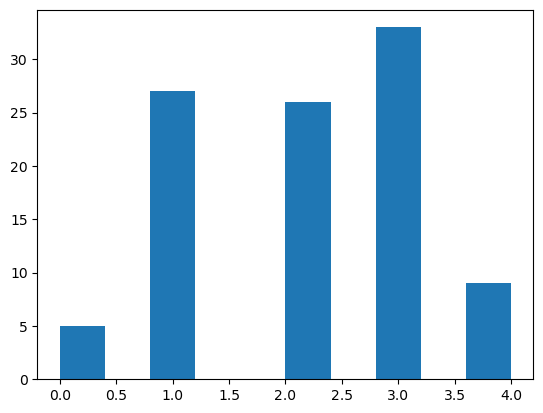

In [31]:
import numpy as np
import matplotlib.pyplot as plt
p = [1,3,3,3,1]
p = p/np.sum(p)
print(p)

a = []
for i in range(100):
    a.append(np.random.choice(np.arange(5), 2, replace=False, p = p))

a = np.array(a)
# plt.hist(a[:,0])
plt.hist(a[:,1])